In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import warnings

# Ignore a bunch of Arviz/pymc3 deprecated warnings
warnings.filterwarnings('ignore')

### Code 9.22

In [2]:
# assume that y_obs are two observations from a Gaussian dist with mean 0 and var = 1 
y_obs = np.array([-1, 1])

with pm.Model() as m_9_2:
    alpha = pm.Normal('alpha', mu=0, sigma=1000)
    sigma = pm.Exponential('sigma', lam=0.0001)
    mu = alpha
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=y_obs)
    
    trace_9_2 = pm.sample(500, tune=1000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, alpha]


Sampling 3 chains for 1_000 tune and 500 draw iterations (3_000 + 1_500 draws total) took 3 seconds.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 113 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6136434296141635, but should be close to 0.8. Try to increase the number of tuning steps.
There were 197 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4440522556094829, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


### Code 9.23

In [3]:
az.summary(trace_9_2, hdi_prob=0.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,36.256,363.834,-460.768,615.666,37.036,35.399,134.0,75.0,1.30
sigma,643.489,1549.302,19.998,1405.637,207.352,147.393,8.0,28.0,1.31


## Prior Distributions

### Exponential Distribution

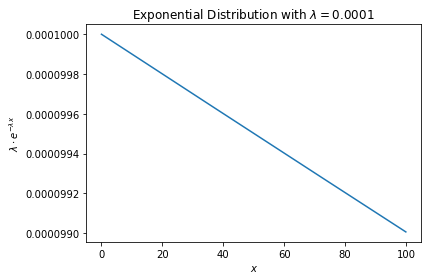

In [4]:
from scipy.stats import expon


lam = 0.0001
scale = 1/lam

x_vals = np.arange(0.01, 100, 0.1)
y_vals = [expon.pdf(x, scale=scale) for x in x_vals]

plt.xlabel(r'$x$')
plt.ylabel(r'$\lambda \cdot e^{- \lambda x}$')
plt.title(fr'Exponential Distribution with $\lambda = {lam}$')
plt.plot(x_vals, y_vals);

### Normal Distribution

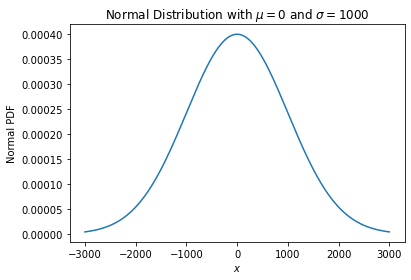

In [5]:
from scipy.stats import norm


mu = 0
sigma = 1000

x_vals = np.arange(-3000.0, 3000.0, 1)
y_vals = [norm.pdf(x, loc=mu, scale=sigma) for x in x_vals]

plt.xlabel(r'$x$')
plt.ylabel('Normal PDF')
plt.title(fr'Normal Distribution with $\mu = {mu}$ and $\sigma = {sigma}$')
plt.plot(x_vals, y_vals);

## Trace Plots

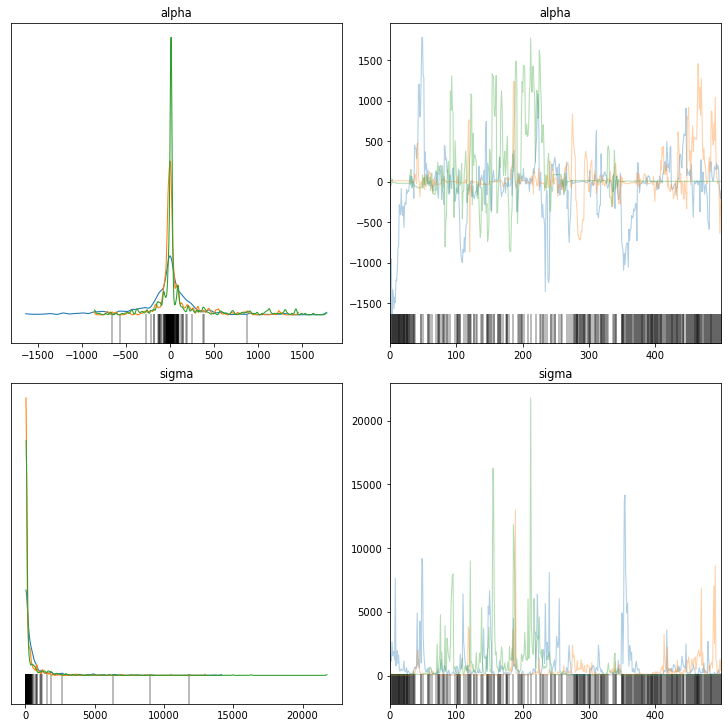

In [7]:
az.plot_trace(trace_9_2, figsize=[10, 10], compact=False);

## Trank Plots

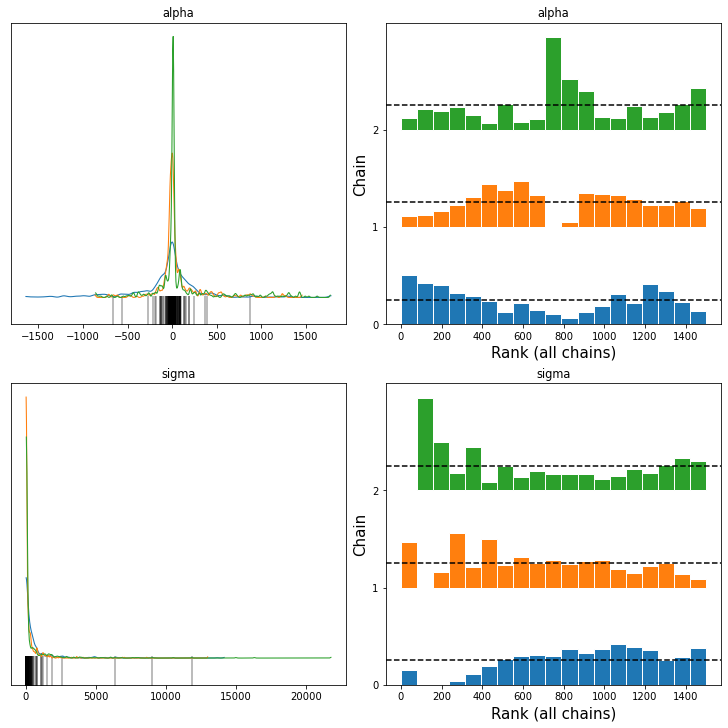

In [8]:
az.plot_trace(trace_9_2, figsize=[10, 10], compact=False, kind='rank_bars');

## Using Weakly Informative Priors Instead of Flat Priors

### Code 9.24

In [9]:
with pm.Model() as m_9_3:
    alpha = pm.Normal('alpha', mu=1, sigma=10)
    sigma = pm.Exponential('sigma', lam=1)
    mu = alpha
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=y_obs)
    
    trace_9_3 = pm.sample(500, tune=1000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, alpha]


Sampling 3 chains for 1_000 tune and 500 draw iterations (3_000 + 1_500 draws total) took 3 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [10]:
az.summary(trace_9_3, hdi_prob=0.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.004,1.105,-1.542,1.799,0.050,0.037,533.0,567.0,1.00
sigma,1.529,0.831,0.506,2.490,0.034,0.024,558.0,534.0,1.01


## Trace and Trank Plots

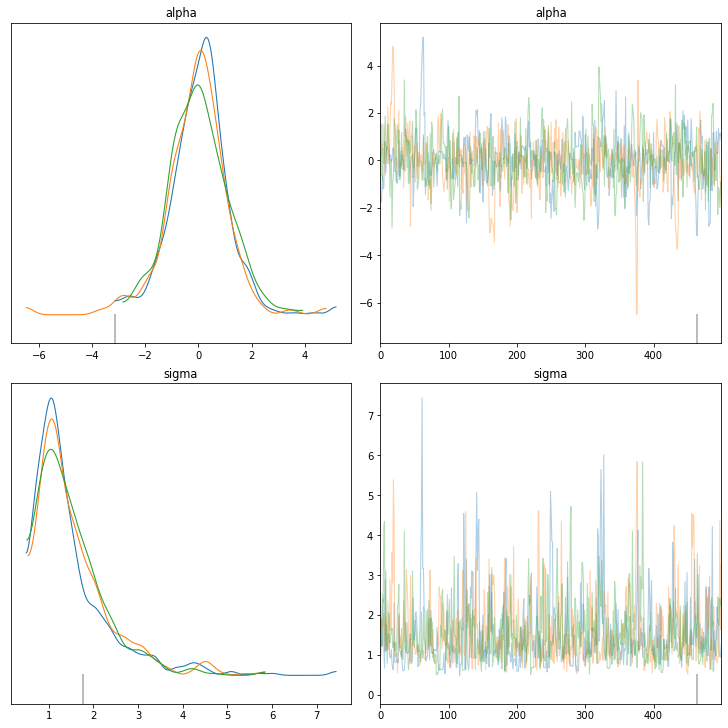

In [11]:
az.plot_trace(trace_9_3, figsize=[10, 10], compact=False);

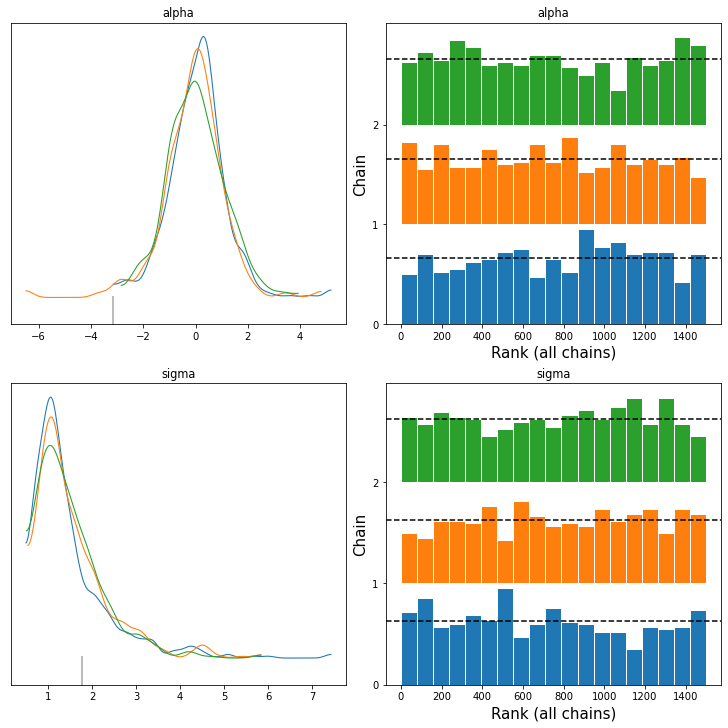

In [12]:
az.plot_trace(trace_9_3, figsize=[10, 10], compact=False, kind='rank_bars');

## Priors and Posteriors in Model m_9_3

Adapated from: https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_09.ipynb

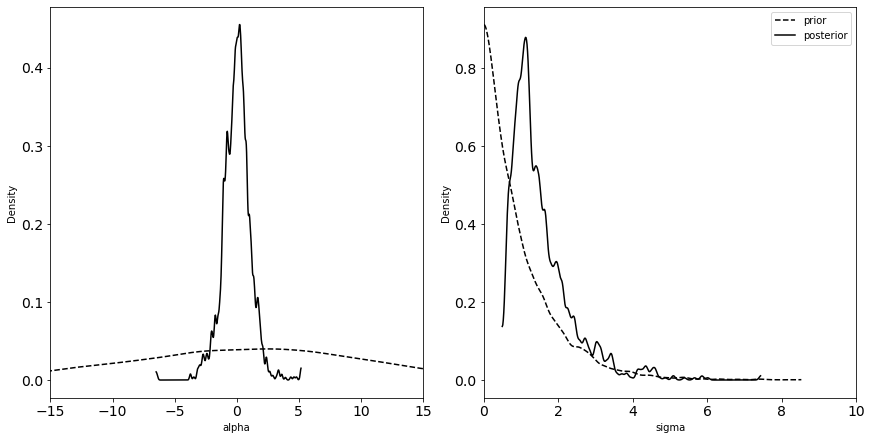

In [18]:
NUM_SAMPLES = int(1e4)
var_names = ['alpha', 'sigma']

with m_9_3:
    m_9_3_prio = pm.sample_prior_predictive(NUM_SAMPLES, var_names=var_names)
    m_9_3_post = pm.sample_posterior_predictive(trace_9_3, NUM_SAMPLES, var_names=var_names)

_, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 6], constrained_layout=True)

az.plot_kde(m_9_3_prio["alpha"], ax=ax0, plot_kwargs={"color": "k", "ls": "dashed"})
az.plot_kde(m_9_3_post["alpha"], ax=ax0, plot_kwargs={"color": "k"})

ax0.set_xlim(-15, 15)
ax0.set_xlabel("alpha")

az.plot_kde(m_9_3_prio["sigma"], ax=ax1, plot_kwargs={"color": "k", "ls": "dashed"}, label="prior")
az.plot_kde(m_9_3_post["sigma"], ax=ax1, plot_kwargs={"color": "k"}, label="posterior")

ax1.legend()
ax1.set_xlim(0, 10)
ax1.set_xlabel("sigma")

for ax in axs:
    ax.set_ylabel("Density");